# MNIST digits classification with Keras

We don't expect you to code anything here because you've already solved it with TensorFlow.

But you can appreciate how simpler it is with Keras.

We'll be happy if you play around with the architecture though, there're some tips at the end.

<img src="images/mnist_sample.png" style="width:30%">

In [1]:
import numpy as np
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
%matplotlib inline
import tensorflow as tf
print("We're using TF", tf.__version__)
import keras
print("We are using Keras", keras.__version__)

import sys
sys.path.append("../..")
import keras_utils
from keras_utils import reset_tf_session

We're using TF 1.10.0
We are using Keras 2.2.2


Using TensorFlow backend.


# Look at the data

In this task we have 50000 28x28 images of digits from 0 to 9.
We will train a classifier on this data.

In [2]:
import preprocessed_mnist
X_train, y_train, X_val, y_val, X_test, y_test = preprocessed_mnist.load_dataset()

X_train [shape (50000, 28, 28)] sample patch:
 [[0.         0.29803922 0.96470588 0.98823529 0.43921569]
 [0.         0.33333333 0.98823529 0.90196078 0.09803922]
 [0.         0.33333333 0.98823529 0.8745098  0.        ]
 [0.         0.33333333 0.98823529 0.56862745 0.        ]
 [0.         0.3372549  0.99215686 0.88235294 0.        ]]
A closeup of a sample patch:


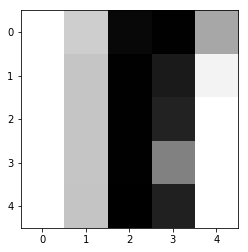

And the whole sample:


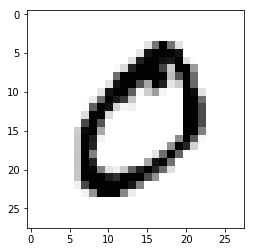

y_train [shape (50000,)] 10 samples:
 [5 0 4 1 9 2 1 3 1 4]


In [3]:
# X contains rgb values divided by 255
print("X_train [shape %s] sample patch:\n" % (str(X_train.shape)), X_train[1, 15:20, 5:10])
print("A closeup of a sample patch:")
plt.imshow(X_train[1, 15:20, 5:10], cmap="Greys")
plt.show()
print("And the whole sample:")
plt.imshow(X_train[1], cmap="Greys")
plt.show()
print("y_train [shape %s] 10 samples:\n" % (str(y_train.shape)), y_train[:10])

In [4]:
# flatten images
X_train_flat = X_train.reshape((X_train.shape[0], -1))
print(X_train_flat.shape)

X_val_flat = X_val.reshape((X_val.shape[0], -1))
print(X_val_flat.shape)

(50000, 784)
(10000, 784)


In [5]:
# one-hot encode the target
y_train_oh = keras.utils.to_categorical(y_train, 10)
y_val_oh = keras.utils.to_categorical(y_val, 10)

print(y_train_oh.shape)
print(y_train_oh[:3], y_train[:3])

(50000, 10)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]] [5 0 4]


In [22]:
# building a model with keras
from keras.layers import Dense, Activation, Flatten
from keras.models import Sequential

# we still need to clear a graph though
s = reset_tf_session()

model = Sequential()  # it is a feed-forward network without loops like in RNN
model.add(Dense(256, input_shape=(784,), activation='sigmoid'))  # the first layer must specify the input shape (replacing placeholders)
# model.add(Activation('sigmoid'))
model.add(Dense(256, activation='sigmoid'))
# model.add(Activation('sigmoid'))
model.add(Dense(10, activation='softmax'))
# model.add(Activation('softmax'))

In [9]:
# you can look at all layers and parameter count
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [10]:
# now we "compile" the model specifying the loss and optimizer
model.compile(
    loss='categorical_crossentropy', # this is our cross-entropy
    optimizer='adam',
    metrics=['accuracy']  # report accuracy during training
)

In [11]:
# and now we can fit the model with model.fit()
# and we don't have to write loops and batching manually as in TensorFlow
model.fit(
    X_train_flat, 
    y_train_oh,
    batch_size=512, 
    epochs=40,
    validation_data=(X_val_flat, y_val_oh),
    callbacks=[keras_utils.TqdmProgressCallback()],
    verbose=0
)


Epoch 1/40




Epoch 2/40




Epoch 3/40




Epoch 4/40




Epoch 5/40




Epoch 6/40




Epoch 7/40




Epoch 8/40




Epoch 9/40




Epoch 10/40




Epoch 11/40




Epoch 12/40




Epoch 13/40




Epoch 14/40




Epoch 15/40




Epoch 16/40




Epoch 17/40




Epoch 18/40




Epoch 19/40




Epoch 20/40




Epoch 21/40




Epoch 22/40




Epoch 23/40




Epoch 24/40




Epoch 25/40




Epoch 26/40




Epoch 27/40




Epoch 28/40




Epoch 29/40




Epoch 30/40




Epoch 31/40




Epoch 32/40




Epoch 33/40




Epoch 34/40




Epoch 35/40




Epoch 36/40




Epoch 37/40




Epoch 38/40




Epoch 39/40




Epoch 40/40


# Here're the notes for those who want to play around here

Here are some tips on what you could do:

 * __Network size__
   * More neurons, 
   * More layers, ([docs](https://keras.io/))

   * Other nonlinearities in the hidden layers
     * tanh, relu, leaky relu, etc
   * Larger networks may take more epochs to train, so don't discard your net just because it could didn't beat the baseline in 5 epochs.


 * __Early Stopping__
   * Training for 100 epochs regardless of anything is probably a bad idea.
   * Some networks converge over 5 epochs, others - over 500.
   * Way to go: stop when validation score is 10 iterations past maximum
     

 * __Faster optimization__
   * rmsprop, nesterov_momentum, adam, adagrad and so on.
     * Converge faster and sometimes reach better optima
     * It might make sense to tweak learning rate/momentum, other learning parameters, batch size and number of epochs


 * __Regularize__ to prevent overfitting
   * Add some L2 weight norm to the loss function, theano will do the rest
     * Can be done manually or via - https://keras.io/regularizers/
   
   
 * __Data augmemntation__ - getting 5x as large dataset for free is a great deal
   * https://keras.io/preprocessing/image/
   * Zoom-in+slice = move
   * Rotate+zoom(to remove black stripes)
   * any other perturbations
   * Simple way to do that (if you have PIL/Image): 
     * ```from scipy.misc import imrotate,imresize```
     * and a few slicing
   * Stay realistic. There's usually no point in flipping dogs upside down as that is not the way you usually see them.

In [12]:
model = Sequential()  # it is a feed-forward network without loops like in RNN
model.add(Dense(256, input_shape=(784,), activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)))  # the first layer must specify the input shape (replacing placeholders)
# model.add(Activation('sigmoid'))
model.add(Dense(256, activation='sigmoid', kernel_regularizer=keras.regularizers.l2(0.001)))
# model.add(Activation('sigmoid'))
model.add(Dense(10, activation='softmax'))

In [13]:
# now we "compile" the model specifying the loss and optimizer
model.compile(
    loss='categorical_crossentropy', # this is our cross-entropy
    optimizer='adam',
    metrics=['accuracy']  # report accuracy during training
)

In [14]:
model.fit(
    X_train_flat, 
    y_train_oh,
    batch_size=512, 
    epochs=40,
    validation_data=(X_val_flat, y_val_oh),
    callbacks=[keras_utils.TqdmProgressCallback()],
    verbose=1
)

Train on 50000 samples, validate on 10000 samples
Epoch 1/40

Epoch 1/40


50000/50000 [==============================] - 1s 19us/step - loss: 1.2542 - acc: 0.7926 - val_loss: 0.6690 - val_acc: 0.9186

Epoch 2/40

Epoch 2/40


50000/50000 [==============================] - 1s 16us/step - loss: 0.6009 - acc: 0.9173 - val_loss: 0.5021 - val_acc: 0.9342

Epoch 3/40

Epoch 3/40


50000/50000 [==============================] - 1s 16us/step - loss: 0.4737 - acc: 0.9314 - val_loss: 0.4188 - val_acc: 0.9423

Epoch 4/40

Epoch 4/40


50000/50000 [==============================] - 1s 16us/step - loss: 0.4040 - acc: 0.9409 - val_loss: 0.3622 - val_acc: 0.9520

Epoch 5/40

Epoch 5/40


50000/50000 [==============================] - 1s 16us/step - loss: 0.3606 - acc: 0.9480 - val_loss: 0.3348 - val_acc: 0.9577

Epoch 6/40

Epoch 6/40


50000/50000 [==============================] - 1s 16us/step - loss: 0.3347 - acc: 0.9533 - val_loss: 0.3153 - val_acc: 0.9597

Epoch 7/40

Epoch 7/40


50000/50000 [==============================] - 1s 15us/step - loss: 0.3164 - acc: 0.9568 - val_loss: 0.2968 - val_acc: 0.9632

Epoch 8/40

Epoch 8/40


50000/50000 [==============================] - 1s 16us/step - loss: 0.2990 - acc: 0.9600 - val_loss: 0.2848 - val_acc: 0.9649

Epoch 9/40

Epoch 9/40


50000/50000 [==============================] - 1s 16us/step - loss: 0.2878 - acc: 0.9622 - val_loss: 0.2777 - val_acc: 0.9654

Epoch 10/40

Epoch 10/40


50000/50000 [==============================] - 1s 15us/step - loss: 0.2789 - acc: 0.9641 - val_loss: 0.2714 - val_acc: 0.9664

Epoch 11/40

Epoch 11/40


50000/50000 [==============================] - 1s 15us/step - loss: 0.2702 - acc: 0.9655 - val_loss: 0.2650 - val_acc: 0.9680

Epoch 12/40

Epoch 12/40


50000/50000 [==============================] - 1s 16us/step - loss: 0.2617 - acc: 0.9677 - val_loss: 0.2614 - val_acc: 0.9691

Epoch 13/40

Epoch 13/40


50000/50000 [==============================] - 1s 16us/step - loss: 0.2543 - acc: 0.9694 - val_loss: 0.2483 - val_acc: 0.9715

Epoch 14/40

Epoch 14/40


50000/50000 [==============================] - 1s 16us/step - loss: 0.2493 - acc: 0.9694 - val_loss: 0.2523 - val_acc: 0.9684

Epoch 15/40

Epoch 15/40


50000/50000 [==============================] - 1s 16us/step - loss: 0.2456 - acc: 0.9696 - val_loss: 0.2419 - val_acc: 0.9707

Epoch 16/40

Epoch 16/40


50000/50000 [==============================] - 1s 15us/step - loss: 0.2399 - acc: 0.9715 - val_loss: 0.2404 - val_acc: 0.9714

Epoch 17/40

Epoch 17/40


50000/50000 [==============================] - 1s 16us/step - loss: 0.2356 - acc: 0.9719 - val_loss: 0.2348 - val_acc: 0.9726

Epoch 18/40

Epoch 18/40


50000/50000 [==============================] - 1s 16us/step - loss: 0.2306 - acc: 0.9729 - val_loss: 0.2313 - val_acc: 0.9722

Epoch 19/40

Epoch 19/40


50000/50000 [==============================] - 1s 15us/step - loss: 0.2263 - acc: 0.9742 - val_loss: 0.2268 - val_acc: 0.9729

Epoch 20/40

Epoch 20/40


50000/50000 [==============================] - 1s 16us/step - loss: 0.2232 - acc: 0.9741 - val_loss: 0.2263 - val_acc: 0.9725

Epoch 21/40

Epoch 21/40


50000/50000 [==============================] - 1s 16us/step - loss: 0.2208 - acc: 0.9741 - val_loss: 0.2242 - val_acc: 0.9728

Epoch 22/40

Epoch 22/40


50000/50000 [==============================] - 1s 16us/step - loss: 0.2168 - acc: 0.9751 - val_loss: 0.2202 - val_acc: 0.9728

Epoch 23/40

Epoch 23/40


50000/50000 [==============================] - 1s 16us/step - loss: 0.2135 - acc: 0.9748 - val_loss: 0.2226 - val_acc: 0.9728

Epoch 24/40

Epoch 24/40


50000/50000 [==============================] - 1s 16us/step - loss: 0.2116 - acc: 0.9761 - val_loss: 0.2137 - val_acc: 0.9743

Epoch 25/40

Epoch 25/40


50000/50000 [==============================] - 1s 16us/step - loss: 0.2083 - acc: 0.9764 - val_loss: 0.2160 - val_acc: 0.9743

Epoch 26/40

Epoch 26/40


50000/50000 [==============================] - 1s 16us/step - loss: 0.2048 - acc: 0.9772 - val_loss: 0.2192 - val_acc: 0.9733

Epoch 27/40

Epoch 27/40


50000/50000 [==============================] - 1s 15us/step - loss: 0.2039 - acc: 0.9764 - val_loss: 0.2121 - val_acc: 0.9738

Epoch 28/40

Epoch 28/40


50000/50000 [==============================] - 1s 15us/step - loss: 0.2015 - acc: 0.9774 - val_loss: 0.2092 - val_acc: 0.9730

Epoch 29/40

Epoch 29/40


50000/50000 [==============================] - 1s 15us/step - loss: 0.1988 - acc: 0.9781 - val_loss: 0.2090 - val_acc: 0.9748

Epoch 30/40

Epoch 30/40


50000/50000 [==============================] - 1s 16us/step - loss: 0.1988 - acc: 0.9767 - val_loss: 0.2080 - val_acc: 0.9750

Epoch 31/40

Epoch 31/40


50000/50000 [==============================] - 1s 16us/step - loss: 0.1951 - acc: 0.9785 - val_loss: 0.2078 - val_acc: 0.9739

Epoch 32/40

Epoch 32/40


50000/50000 [==============================] - 1s 15us/step - loss: 0.1924 - acc: 0.9785 - val_loss: 0.2009 - val_acc: 0.9759

Epoch 33/40

Epoch 33/40


50000/50000 [==============================] - 1s 15us/step - loss: 0.1897 - acc: 0.9798 - val_loss: 0.1982 - val_acc: 0.9757

Epoch 34/40

Epoch 34/40


50000/50000 [==============================] - 1s 16us/step - loss: 0.1894 - acc: 0.9788 - val_loss: 0.1972 - val_acc: 0.9756

Epoch 35/40

Epoch 35/40


50000/50000 [==============================] - 1s 16us/step - loss: 0.1860 - acc: 0.9796 - val_loss: 0.1936 - val_acc: 0.9772

Epoch 36/40

Epoch 36/40


50000/50000 [==============================] - 1s 15us/step - loss: 0.1840 - acc: 0.9804 - val_loss: 0.1941 - val_acc: 0.9770

Epoch 37/40

Epoch 37/40


50000/50000 [==============================] - 1s 16us/step - loss: 0.1820 - acc: 0.9804 - val_loss: 0.1965 - val_acc: 0.9758

Epoch 38/40

Epoch 38/40


50000/50000 [==============================] - 1s 16us/step - loss: 0.1833 - acc: 0.9802 - val_loss: 0.1968 - val_acc: 0.9746

Epoch 39/40

Epoch 39/40


50000/50000 [==============================] - 1s 16us/step - loss: 0.1806 - acc: 0.9794 - val_loss: 0.1890 - val_acc: 0.9768

Epoch 40/40

Epoch 40/40


50000/50000 [==============================] - 1s 16us/step - loss: 0.1789 - acc: 0.9804 - val_loss: 0.1895 - val_acc: 0.9769



In [15]:
from keras.preprocessing.image import ImageDataGenerator

In [92]:
datagen = ImageDataGenerator(
#     featurewise_center=True,
#     featurewise_std_normalization=True,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1)

In [93]:
X_datagen = np.reshape(X_train, X_train.shape + (1,))
X_val_datagen = np.reshape(X_val, X_val.shape + (1,))

In [94]:
datagen.fit(X_datagen)

In [95]:
# we still need to clear a graph though
s = reset_tf_session()

model = Sequential()  # it is a feed-forward network without loops like in RNN
model.add(Flatten(input_shape=(28, 28, 1)))
model.add(Dense(256, activation='sigmoid', kernel_regularizer=keras.regularizers.l2(0.001)))  # the first layer must specify the input shape (replacing placeholders)
# model.add(Activation('sigmoid'))
model.add(Dense(256, activation='sigmoid', kernel_regularizer=keras.regularizers.l2(0.001)))
# model.add(Activation('sigmoid'))
model.add(Dense(10, activation='softmax'))

In [96]:
# now we "compile" the model specifying the loss and optimizer
model.compile(
    loss='categorical_crossentropy', # this is our cross-entropy
    optimizer='adam',
    metrics=['accuracy']  # report accuracy during training
)

In [100]:
# fits the model on batches with real-time data augmentation:
model.fit_generator(datagen.flow(X_datagen, y_train_oh, batch_size=512),
                    steps_per_epoch=len(X_datagen) / 512,
                    epochs=40,
                    
                    use_multiprocessing=True,
                    validation_data=(X_val_datagen, y_val_oh))

Epoch 1/40
98/97 [==============================] - 7s 69ms/step - loss: 0.5745 - acc: 0.9222 - val_loss: 0.4579 - val_acc: 0.9587
Epoch 2/40
98/97 [==============================] - 7s 67ms/step - loss: 0.5723 - acc: 0.9257 - val_loss: 0.4545 - val_acc: 0.9603
Epoch 3/40
98/97 [==============================] - 7s 67ms/step - loss: 0.5664 - acc: 0.9245 - val_loss: 0.4554 - val_acc: 0.9565
Epoch 4/40
98/97 [==============================] - 7s 68ms/step - loss: 0.5674 - acc: 0.9256 - val_loss: 0.4555 - val_acc: 0.9579
Epoch 5/40
98/97 [==============================] - 7s 68ms/step - loss: 0.5665 - acc: 0.9265 - val_loss: 0.4579 - val_acc: 0.9546
Epoch 6/40
98/97 [==============================] - 7s 68ms/step - loss: 0.5600 - acc: 0.9271 - val_loss: 0.4649 - val_acc: 0.9530
Epoch 7/40
98/97 [==============================] - 7s 68ms/step - loss: 0.5597 - acc: 0.9259 - val_loss: 0.4472 - val_acc: 0.9599
Epoch 8/40
98/97 [==============================] - 7s 68ms/step - loss: 0.5638 - a

Epoch 0


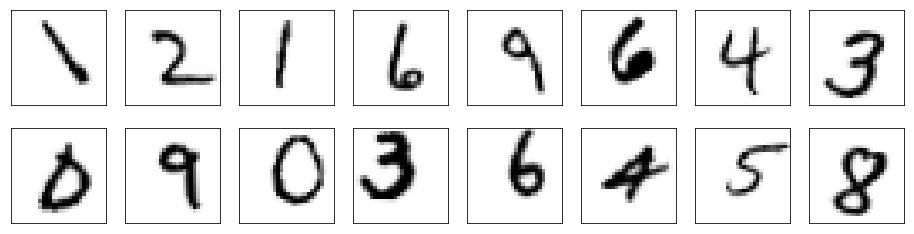

Epoch 1


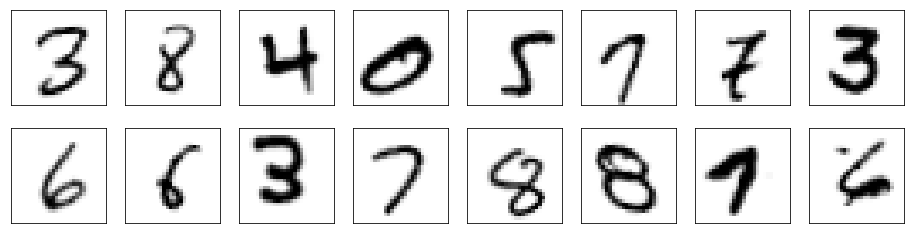

In [97]:

for e in range(2):
    plt.figure(figsize=(16,4))
    print('Epoch', e)
    batches = 0
    for x_batch, y_batch in datagen.flow(X_datagen, y_train_oh, batch_size=16):
        for i in range(16):
            plt.subplot(2,8, i+1)
            plt.xticks([])
            plt.yticks([])
            plt.imshow(x_batch[i, :, :, 0], cmap="Greys")
        plt.show()
        break